# [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

- [step-by-step exaplanation](https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2)
 - [updated link](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
- [A One-Stop Shop for Principal Component Analysis](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)
- [demo on iris dataset](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
%matplotlib inline

In [10]:
# import some data to play with
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [118]:
X = pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.DataFrame(iris.target,columns=['target'])
y['target_name'] = y['target'].map({e:n for e,n in enumerate(iris.target_names)})

### 1. Standardize the Data

PCA is effected by scale, you need to scale the features in your data before applying PCA. Scikits StandardScaler is used to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

e'g "If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect."

[See more negative effect not scaling your data can have](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

In [11]:
from sklearn.preprocessing import StandardScaler

In [34]:
Xt = pd.DataFrame(StandardScaler().fit_transform(X),
                  columns=iris.feature_names)
Xt[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977


### 2. Reduce Dimension using PCA

In [69]:
pca = PCA()
principalComponents = pca.fit_transform(Xt)

#### 2.1 Covariance matrix
The aim is to understand how the features vary from the mean with respect to each other, in other words, to see if there is any relationship between them. The covariance matrix is a n × n symmetric matrix (where n is the number of features).

- positive: the two variables increase or decrease together (correlated)
- negative: One increases when the other decreases (not correlated)

In [70]:
pd.DataFrame(pca.get_covariance(),
             columns=iris.feature_names,
             index=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.110103,0.877605,0.823443
sepal width (cm),-0.110103,1.006711,-0.423338,-0.358937
petal length (cm),0.877605,-0.423338,1.006711,0.969219
petal width (cm),0.823443,-0.358937,0.969219,1.006711


#### 2.2 Eigenvectors and Eigenvalues
The eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of [variance carried in each Principal Component.](https://cdn-images-1.medium.com/max/800/1*UpFltkN-kT9aGqfLhOR9xg.gif)

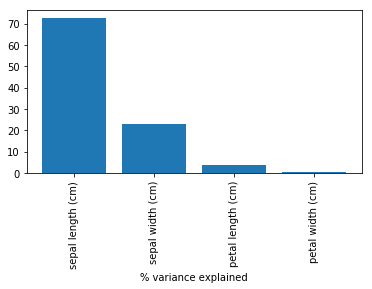

In [91]:
fig,axs = plt.subplots(1,1,figsize=(6,3))

xticks = np.arange(1,5,1)
axs.bar(xticks,pca.explained_variance_ratio_*100)
axs.set_xticks(xticks)
axs.set_xticklabels(iris.feature_names,rotation=90)
axs.set_xlabel('% variance explained');

#### 2.3 Feature Vector
The above eigenvector eigenvalues indicate that features 1 (75%) and 2 (22%) exaplin some 97% of the variance of the iris data set. So lets choose 2 PC's

In [92]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xt)

In [100]:
pca_result = pd.DataFrame(data = principalComponents,
                       columns = ['principal component 1', 'principal component 2'])

In [119]:
result = pd.concat([pca_result,y],axis=1)

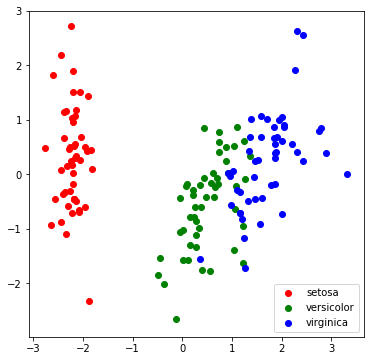

In [128]:
fig,axs = plt.subplots(1,1,figsize=(6,6))
colors = ['r', 'g', 'b']

for typ,color in zip(iris.target_names,colors):
    mask = result['target_name'] == typ
    axs.scatter(x=result[mask]['principal component 1'],
            y=result[mask]['principal component 2'],
            c=color,
            label=typ)

axs.legend();